# Retrieval and Preparation of Hourly Weather Data

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import zipfile

In [2]:
matplotlib.rcParams['figure.figsize'] = [16, 9]
pd.options.display.max_columns = 999

## Load Data

Five years of hourly measurements of various weather attributes. This data is available for 30 US and Canadian Cities, as well as 6 Israeli cities.

Source: <a href='https://www.kaggle.com/selfishgene/historical-hourly-weather-data/home'>Kaggle</a>

In [3]:
!kaggle datasets download -d selfishgene/historical-hourly-weather-data -p ./weather --force

historical-hourly-weather-data.zip: Downloaded 1MB of 12MB
historical-hourly-weather-data.zip: Downloaded 2MB of 12MB
historical-hourly-weather-data.zip: Downloaded 3MB of 12MB
historical-hourly-weather-data.zip: Downloaded 4MB of 12MB
historical-hourly-weather-data.zip: Downloaded 5MB of 12MB
historical-hourly-weather-data.zip: Downloaded 6MB of 12MB
historical-hourly-weather-data.zip: Downloaded 7MB of 12MB
historical-hourly-weather-data.zip: Downloaded 8MB of 12MB
historical-hourly-weather-data.zip: Downloaded 9MB of 12MB
historical-hourly-weather-data.zip: Downloaded 10MB of 12MB
historical-hourly-weather-data.zip: Downloaded 11MB of 12MB
historical-hourly-weather-data.zip: Downloaded 12MB of 12MB



In [4]:
with zipfile.ZipFile('weather/historical-hourly-weather-data.zip', 'r') as zip_ref:
    zip_ref.extractall('weather')

##  Prepare Datasets

The temperature, wind_direction and wind_speed datasets will be used.

In [5]:
datasets = ['temperature', 'wind_direction', 'wind_speed']

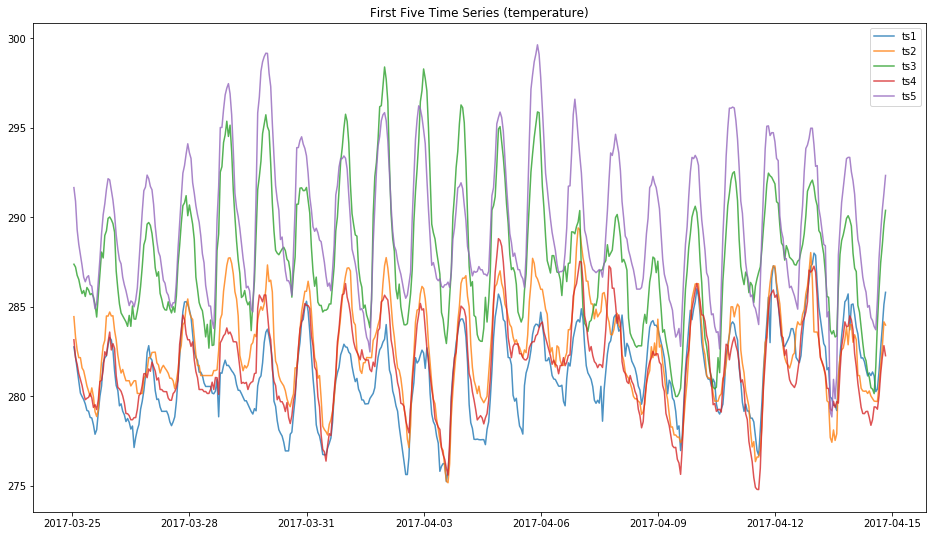

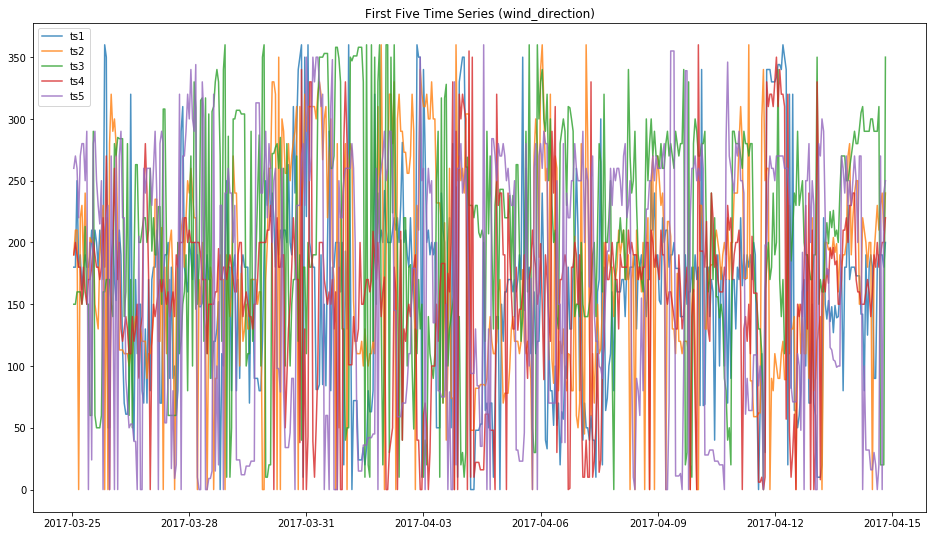

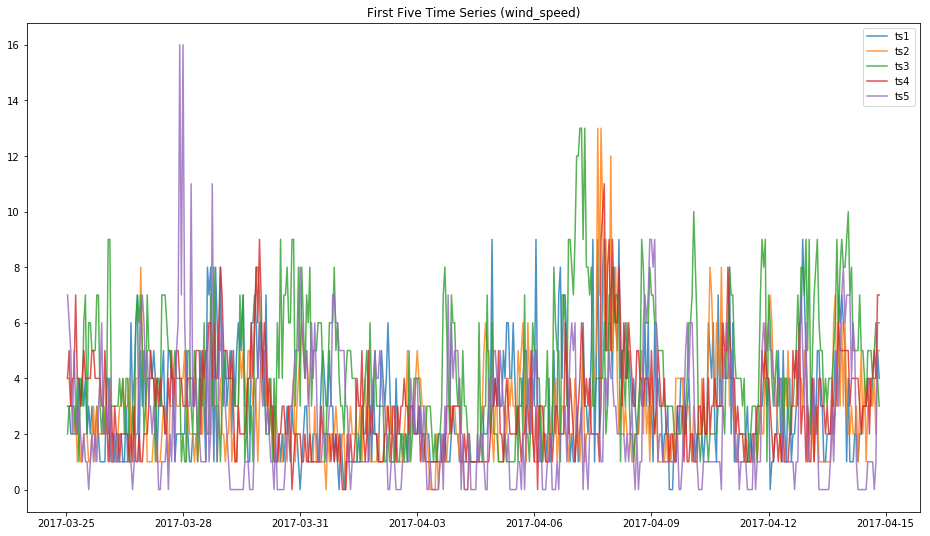

In [6]:
for dataset in datasets:
    df = pd.read_csv('weather/{}.csv'.format(dataset), parse_dates=[0], index_col=[0])
    df.index.names = ['DateTime']
    df.columns = ['ts{}'.format(i+1) for i in range(len(df.columns))]

    # First row is completely missing, and there are many missing values in last 1000 rows
    df = df.drop(df.index[0])
    df = df.drop(df.index[-1000:])

    # Forward fill any remaining missing values
    df = df.fillna(method='ffill')
    df = df.iloc[-5000:]

    # Visualise first five columns of dataset
    for col in df.columns[:5]:
        plt.plot(df.index[:500], df[col][:500], alpha=0.8, label=col)
    plt.legend()
    plt.title("First Five Time Series ({})".format(dataset))
    plt.show()
    
    # Save dataset
    df.to_csv('hourly-weather-{}.csv'.format(dataset))

## Delete Raw Files

In [7]:
!rm -rf weather